/Users/naokikomiya/dev_komiya/dlg_slack_competition/.venv/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


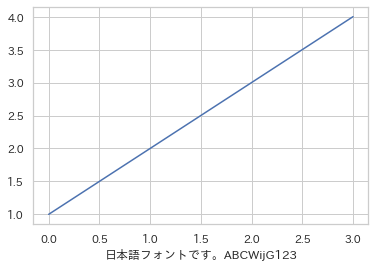

/Users/naokikomiya/dev_komiya/dlg_slack_competition/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/naokikomiya/dev_komiya/dlg_slack_competition/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/naokikomiya/dev_komiya/dlg_slack_competition/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:340: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

[132]
[118]
[130]
[129]
[98]
[59]
[49]
[67]
[123]
[123]
[98]
[123]
[131]
[131]
[120]
[121]
[77]
[35]
[130]
[123]
[]
[73]
[81]
[44]
[]
[124]
[131]
[121]
[122]
[]
[122]
[78]
[]
[]
[91]
[22]
[123]
[130]
[70]
[124]
[75]
[121]
[]
[80]
[]
[]
[119]
[36]
[]
[]
[15]
[]
[]
[38]
[]
[122]
[18]
[18]
[]
[66]
[]
[]
[]
[74]
[123]
[69]
[131]
[]
[111]
[70]
[18]
[45]
[14]
[115]
[55]
[54]
[68]
[]
[121]
[]
[]
[75]


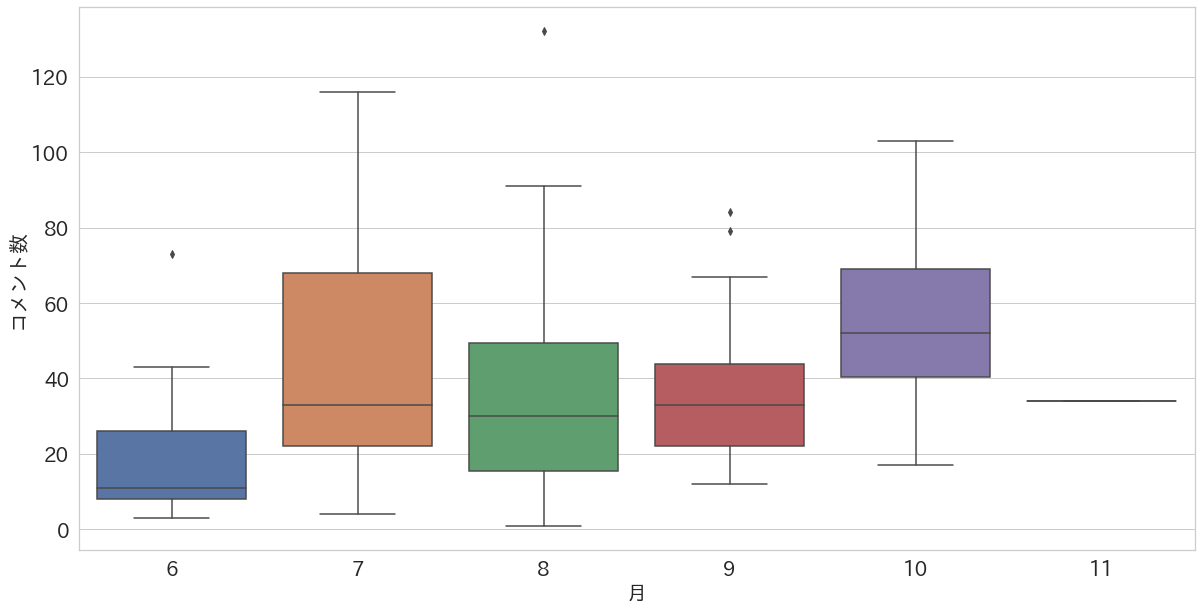

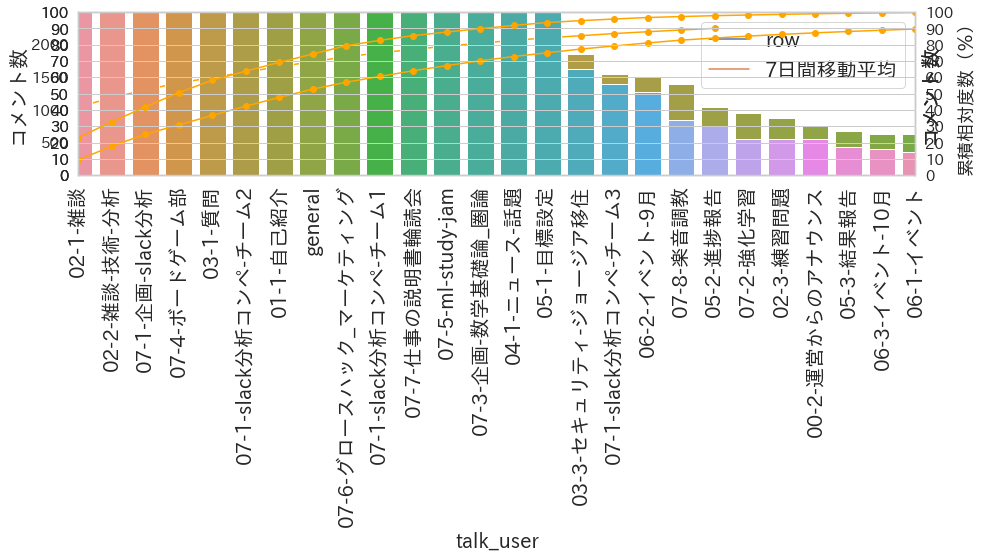

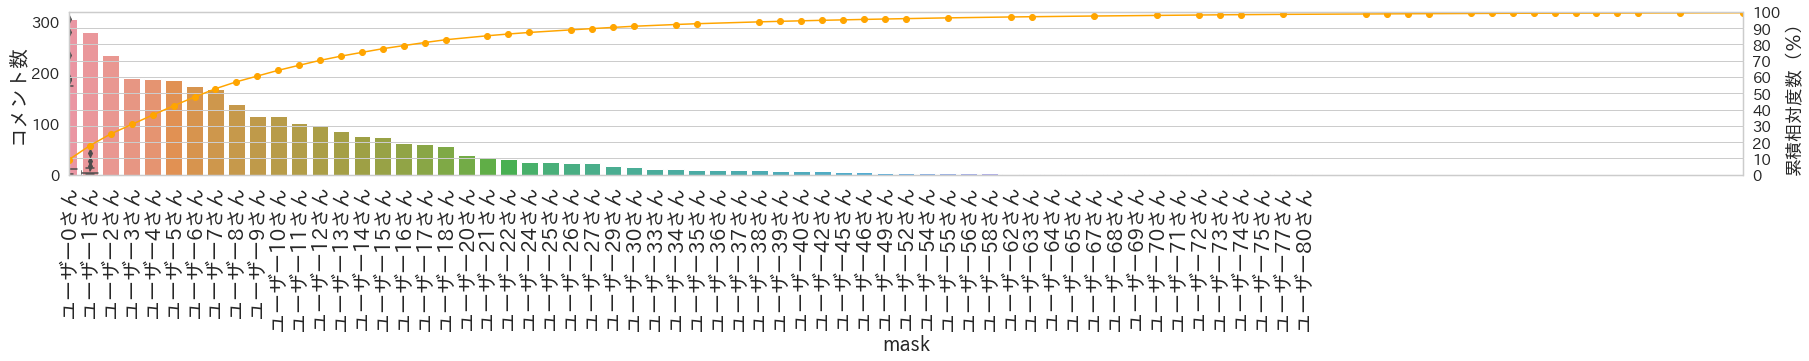

In [2]:
# -*- coding: utf-8 -*-
"""talk.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1z5xb3Ad5sW-KY4jg2xqsZc-J57yFhnWl
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from matplotlib import rcParams
sns.set(font="IPAexGothic", style="whitegrid")

import matplotlib as mpl
print(mpl.matplotlib_fname())

plt.plot([1, 2, 3, 4])
plt.xlabel('日本語フォントです。ABCWijG123')
plt.show()

#talks
talk_df = pd.read_csv("input/talks.csv",sep='\t')

#channels
channel_df = pd.read_csv("input/channels.csv",sep='\t')

#users
user_df = pd.read_csv("input/users.csv",sep='\t')

talk_df[talk_df["channel_id"]=="CNX7CKQJ1"]

#talk.csvのchannel数を調べる　→　channels.csvに対して１つ足りない
len(set(talk_df["channel_id"]))

set(talk_df["channel_id"])

channel_df["id"]

# Commented out IPython magic to ensure Python compatibility.
# %clear shadow_compress

talk_df.tail()

#まず'<@.........>さんがチャンネルに参加しました'を空白文字にする
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace('<@.{9}>さんがチャンネルに参加しました',"", regex=True)

#文中からリンクと<https:.........>、メンション<@.........>を排除
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace('<.*>',"", regex=True)

talk_df.tail()

talk_df.tail(10)

#```.....```で囲まれた箇所（コード）を空白にする
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace("```(.|\s)*```","", regex=True)

#:...: で絵文字を削除
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace(":.*:","", regex=True)

#&gt;（< >HTMLタグ）を削除
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace("\s&gt;","",regex=True)
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace("^&gt;","",regex=True)
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace(".&gt;","",regex=True)
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace(".&lt;","",regex=True)

talk_df.tail(10)

#文中の@を削除
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace("(.|\s)@(.|\s)","",regex=True)

#記号"■","●","#","【","】"を削除
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace(["\s■","\s●","\s#","\s・","\s【","】\s"],"",regex=True)

#記号"■","●","#","【","】"を削除
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace(["^■","^●","^#","^・","^【","】","^↑"],"",regex=True)

#"New"だけ以外の行を取り出す
talk_df = talk_df[~talk_df['text'].str.match("New lines on ",na=False)]

#空白以外の行を取り出す
talk_df = talk_df.loc[(talk_df['text']!="") & (talk_df['text']!=" ") & (talk_df['text']!="　")]

talk_df.tail()

talk_df.iloc[3141,:]["text"]

#チャンネル数を調べる
len(set(talk_df["channel_id"]))

set(talk_df["channel_id"])

talk_df[talk_df["channel_id"]=="CJRAUJTFY"]

user_df.head()

#登録者数を調べる
len(user_df["user_id"])

#登録者数一覧の辞書を作る

user_dict = user_df.set_index('user_id')['real_name_normalized']
user_dict = user_dict.to_dict()
user_dict

#channel一覧の辞書を作る
channel_dict = channel_df.set_index('id')['name']
channel_dict = channel_dict.to_dict()
channel_dict

#talk_dfの "talk_user" を　"real_name_normalized" に置き換える
talk_df["talk_user"] = talk_df["talk_user"].map(user_dict)

#talk_dfの "channel_id" を　"name" に置き換える
talk_df["channel_id"] = talk_df["channel_id"].map(channel_dict)

talk_df.head()

#indexを振り直す
talk_df = talk_df.reset_index(drop=True)

talk_df_only_intro=talk_df[talk_df["channel_id"]=="01-1-自己紹介"]

#自己紹介だけを取り出して保存する
talk_df_only_intro.to_csv("talksから自己紹介だけ取り出した.csv")

#投稿時間（ts）を時刻に変換（日本時間）
talk_df["ts"] = pd.to_datetime(talk_df["ts"],utc=True,unit="s")
talk_df['timestamp'] = pd.to_datetime(talk_df['ts'])
talk_df['date'] = talk_df['timestamp'].dt.date
talk_df['date'] = pd.to_datetime(talk_df['date'])

talk_df.head()

#talk_dfを日時ごとにソート
talk_df=talk_df.sort_values(by="timestamp")

#indexを振り直す
talk_df = talk_df.reset_index()

#自己紹介だけ取り出す
talk_df_only_introduce=talk_df[talk_df["channel_id"]=="01-1-自己紹介"]

#自己紹介している人を自己紹介時間でグループ化
talk_df_only_introduce_grouped = talk_df_only_introduce["timestamp"].groupby(talk_df_only_introduce["talk_user"])

#自己紹介した日時を算出
introduce_time=pd.DataFrame(talk_df_only_introduce_grouped.min())

#indexをリセットする
introduce_time=introduce_time.reset_index()

#列名を変える
introduce_time=introduce_time.rename(columns={'timestamp': '自己紹介日時'})

#introduce_timeを日時ごとにソート
introduce_time=introduce_time.sort_values(by="自己紹介日時")

#indexを振り直す
introduce_time=introduce_time.reset_index()

introduce_time.iloc[26]

#自己紹介の初めの日時と最終コメント日時の差分
(talk_df.iloc[-1,:]["timestamp"]- introduce_time["自己紹介日時"][0]).days

len(set(introduce_time["talk_user"]))

#保存する
talk_df.to_csv("talk_df.csv")

#日毎の投稿数
talk_df["date"].value_counts()

date_comment = pd.DataFrame(talk_df["date"].value_counts())
date_comment = date_comment.rename(columns={"date": "comments"})

date_comment["date"] = date_comment.index

date_comment = date_comment.sort_values(by="date")

date_comment.head()

date_comment.to_csv("日ごとのコメント数.csv")

#1日の平均コメント投稿数
date_comment["comments"].mean()

#7日ごとの移動平均線を追加
date_comment["sma_7days"] = date_comment['comments'].rolling(7).mean()

date_comment["month"]=date_comment.index.month

date_comment

plt.figure(figsize=(20, 10))
ax1 = sns.boxplot(x = "month" ,y = "comments",data = date_comment)
ax1.set_ylabel("コメント数" , fontsize=20)
ax1.set_xlabel("月" , fontsize=20)
ax1.tick_params(axis="y",labelsize=20)
ax1.tick_params(axis="x",labelsize=20)

plt.figure(figsize=(20, 10))
ax1 = sns.lineplot(x = "date" ,y = "comments",data = date_comment , label="row")
ax2 = sns.lineplot(x = "date" ,y = "sma_7days",data = date_comment , label="7日間移動平均")


ax1.set_ylabel("コメント数" , fontsize=20)
ax1.set_xlabel("日付" , fontsize=20)
ax1.tick_params(axis="y",labelsize=20)
ax1.tick_params(axis="x",labelsize=20)
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)

#一度csvにしてみる
talk_df.to_csv("talk_df_20191011.csv")

#コメント総数
len(talk_df)

#村上さん以外の発言数
len(talk_df[talk_df["talk_user"]!="村上 智之"])

#チャンネルごとにコメント数を算出する
channel_count = talk_df["channel_id"].value_counts()
channel_count

#ユーザーごとにコメント数を算出する
comment_count = talk_df["talk_user"].value_counts()
comment_count

comment_df = pd.DataFrame(comment_count)

#indexを振り直す
comment_df=comment_df.reset_index()

#名前を付け直す
comment_df.rename(columns={"index":"talk_user","talk_user":"comments"},inplace=True)

comment_df

#村上さんを除いたcomment_df
comment_df_lessMura=comment_df[1:]

#indexを振り直す
comment_df_lessMura=comment_df_lessMura.reset_index()

comment_df_lessMura

comment_df["Percentage[%]"] = (comment_df["comments"]/len(talk_df))*100
comment_df["Cumulative sum[%]"] = comment_df["Percentage[%]"].cumsum()

comment_df_lessMura["Percentage[%]"] = (comment_df_lessMura["comments"]/len(talk_df[talk_df["talk_user"]!="村上 智之"]))*100
comment_df_lessMura["Cumulative sum[%]"] = comment_df_lessMura["Percentage[%]"].cumsum()

comment_df_lessMura

ax1 = sns.barplot(x=comment_df["talk_user"][:20] ,y = "comments",data = comment_df[:20])
ax2 = ax1.twinx()

comment_df["Cumulative sum[%]"][:20].plot(figsize=(15, 3), color='orange', ax=ax2, marker='o')
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation='vertical' , fontsize=20)
ax1.set_ylabel("コメント数" , fontsize=20)
ax2.set_ylabel("累積相対度数（％）" , fontsize=18)
ax2.set_ylim([0,100])
ax1.tick_params(axis="y",labelsize=15,color="white")
ax2.tick_params(axis="y",labelsize=15,color="white")

#ax1の目盛り線を消した
ax1.grid(which = "major", axis = "y", color = "blue", alpha = 0.8,
        linestyle = "", linewidth = 1)

ax2.set_yticks(list(range(0,110,10)))

ax1 = sns.barplot(x=comment_df_lessMura["talk_user"] ,y = "comments",data = comment_df_lessMura)
ax2 = ax1.twinx()

comment_df_lessMura["Cumulative sum[%]"].plot(figsize=(30, 3), color='orange', ax=ax2, marker='o')
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation='vertical' , fontsize=20)
ax1.set_ylabel("コメント数" , fontsize=20)
ax2.set_ylabel("累積相対度数（％）" , fontsize=18)
ax2.set_ylim([0,100])
ax1.tick_params(axis="y",labelsize=15,color="white")
ax2.tick_params(axis="y",labelsize=15,color="white")

#ax1の目盛り線を消した
ax1.grid(which = "major", axis = "y", color = "blue", alpha = 0.8,
        linestyle = "", linewidth = 1)

ax2.set_yticks(list(range(0,110,10)))

channel_df = pd.DataFrame(channel_count)

channel_df

channel_df["Percentage[%]"] = (channel_df["channel_id"]/channel_df["channel_id"].sum())*100
channel_df["Cumulative sum[%]"] = channel_df["Percentage[%]"].cumsum()
channel_df = channel_df.rename(columns={"index": "channel","channel_id":"comments"})

channel_df

ax1 = sns.barplot(x=channel_df.index[:26] ,y = "comments",data = channel_df[:26])
ax2 = ax1.twinx()

channel_df["Cumulative sum[%]"][:26].plot(figsize=(15, 3), color='orange', ax=ax2, marker='o')
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation='vertical' , fontsize=20)
ax1.set_ylabel("コメント数" , fontsize=20)
ax2.set_ylabel("累積相対度数（％）" , fontsize=18)
ax2.set_ylim([0,100])
ax1.tick_params(axis="y",labelsize=15,color="white")
ax2.tick_params(axis="y",labelsize=15,color="white")

#ax1の目盛り線を消した
ax1.grid(which = "major", axis = "y", color = "blue", alpha = 0.8,
        linestyle = "", linewidth = 1)

ax2.set_yticks(list(range(0,110,10)))

#自己紹介だけを抜き出す
only_self_introduction = talk_df[talk_df["channel_id"] == "01-1-自己紹介"]

#自己紹介しているであろうユーザーを抜き出す
user_self_introduction = set(only_self_introduction["talk_user"])
len(user_self_introduction)

#自己紹介している人＝１、していない人＝０
comment_df["自己紹介"]="無"
comment_df["自己紹介してからの日数"]=1

for i in range(len(comment_df)):
    if comment_df["talk_user"][i] in user_self_introduction:
        comment_df["自己紹介"][i]="あり"
        comment_df["自己紹介してからの日数"][i]=(talk_df.iloc[-1,:]["timestamp"]-introduce_time[introduce_time["talk_user"]==comment_df["talk_user"][i]]["自己紹介日時"]).astype('timedelta64[D]').astype(int)
    else:
        comment_df["自己紹介"][i]="なし"
        comment_df["自己紹介してからの日数"][i]=""

#自己紹介している人＝１、していない人＝０
comment_df_lessMura["自己紹介"]="無"
comment_df_lessMura["自己紹介してからの日数"]=1

for i in range(len(comment_df_lessMura)):
    if comment_df_lessMura["talk_user"][i] in user_self_introduction:
        comment_df_lessMura["自己紹介"][i]="あり"
        comment_df_lessMura["自己紹介してからの日数"][i]=(talk_df.iloc[-1,:]["timestamp"]-introduce_time[introduce_time["talk_user"]==comment_df_lessMura["talk_user"][i]]["自己紹介日時"]).astype('timedelta64[D]').astype(int)
    else:
        comment_df_lessMura["自己紹介"][i]="なし"
        comment_df_lessMura["自己紹介してからの日数"][i]=""

(talk_df.iloc[-1,:]["timestamp"]-introduce_time[introduce_time["talk_user"]==comment_df["talk_user"][0]]["自己紹介日時"]).astype('timedelta64[D]').astype(int)

comment_df["自己紹介してからの日数"][1]

(talk_df.iloc[-1,:]["timestamp"]-introduce_time[introduce_time["talk_user"]==comment_df.index[1]]["自己紹介日時"])

for i in range(len(comment_df)):
    print(list((talk_df.iloc[-1,:]["timestamp"]-introduce_time[introduce_time["talk_user"]==comment_df["talk_user"][i]]["自己紹介日時"]).astype('timedelta64[D]').astype(int)))

comment_df

comment_df.to_csv('comment_df.csv')

comment_df_lessMura.to_csv('comment_df_lessMura.csv')

#コメントしているけど自己紹介していない人 21人
comment_df[comment_df["自己紹介"]=="なし"]

#コメントも自己紹介もしてる人 61人
comment_df[comment_df["自己紹介"]=="あり"]

#自己紹介した人としていない人の比較,村上さん除く
plt.figure(figsize=(20, 10))
ax1 = sns.boxplot(x = "自己紹介" ,y = "comments",data = comment_df[1:])
ax1.set_ylabel("コメント数" , fontsize=20)
ax1.set_xlabel("自己紹介の有無" , fontsize=20)
ax1.tick_params(axis="y",labelsize=20)
ax1.tick_params(axis="x",labelsize=20)

#自己紹介している人としていない人のコメント数を比べる（村上さん除く）
user_self_introduction_grouped = comment_df["comments"][1:].groupby(comment_df["自己紹介"][1:])

#自己紹介有無でのコメント平均値
user_self_introduction_grouped.mean()

comment_df_lessMura_only_intro=comment_df_lessMura[comment_df_lessMura["自己紹介"]=="あり"]

comment_df_lessMura['mask'] = [f'ユーザー{i}さん' for i in range(len(comment_df_lessMura['talk_user']))]
#村上さん除いたパレート図（自己紹介ありのみ）
ax1 = sns.barplot(x=comment_df_lessMura[comment_df_lessMura["自己紹介"]=="あり"]["mask"],y = "comments",data = comment_df_lessMura[comment_df_lessMura["自己紹介"]=="あり"])
ax2 = ax1.twinx()

comment_df_lessMura[comment_df_lessMura["自己紹介"]=="あり"]["Cumulative sum[%]"].plot(figsize=(30, 3), color='orange', ax=ax2, marker='o')
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation='vertical' , fontsize=20)
ax1.set_ylabel("コメント数" , fontsize=20)
ax2.set_ylabel("累積相対度数（％）" , fontsize=18)
ax2.set_ylim([0,100])
ax1.tick_params(axis="y",labelsize=15,color="white")
ax2.tick_params(axis="y",labelsize=15,color="white")

#ax1の目盛り線を消した
ax1.grid(which = "major", axis = "y", color = "blue", alpha = 0.8,
        linestyle = "", linewidth = 1)

ax2.set_yticks(list(range(0,110,10)))




/Users/naokikomiya/dev_komiya/dlg_slack_competition/.venv/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


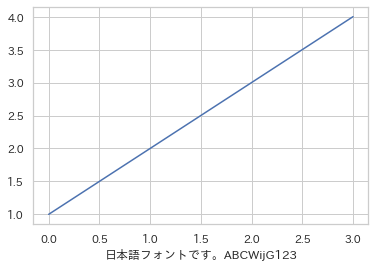

/Users/naokikomiya/dev_komiya/dlg_slack_competition/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/naokikomiya/dev_komiya/dlg_slack_competition/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/naokikomiya/dev_komiya/dlg_slack_competition/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:340: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

[132]
[118]
[130]
[129]
[98]
[59]
[49]
[67]
[123]
[123]
[98]
[123]
[131]
[131]
[120]
[121]
[77]
[35]
[130]
[123]
[]
[73]
[81]
[44]
[]
[124]
[131]
[121]
[122]
[]
[122]
[78]
[]
[]
[91]
[22]
[123]
[130]
[70]
[124]
[75]
[121]
[]
[80]
[]
[]
[119]
[36]
[]
[]
[15]
[]
[]
[38]
[]
[122]
[18]
[18]
[]
[66]
[]
[]
[]
[74]
[123]
[69]
[131]
[]
[111]
[70]
[18]
[45]
[14]
[115]
[55]
[54]
[68]
[]
[121]
[]
[]
[75]


NameError: name 'plot' is not defined

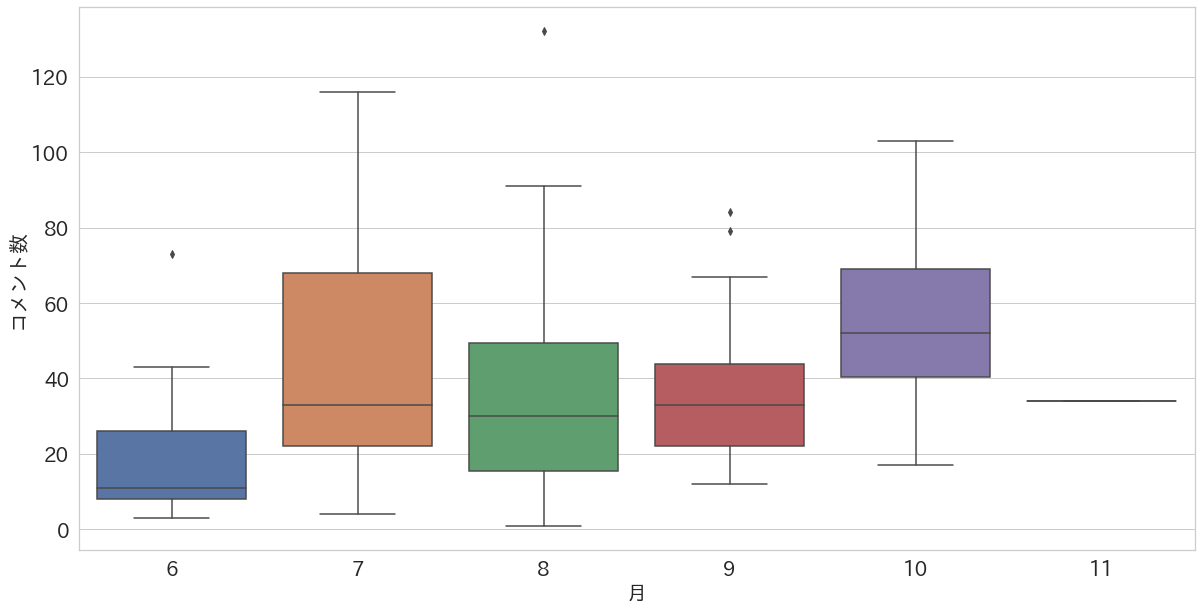

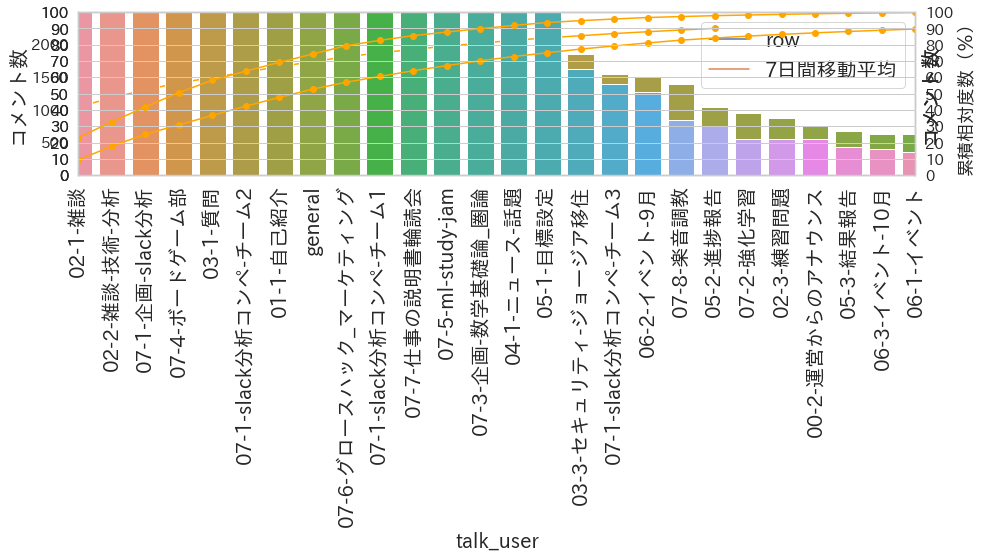

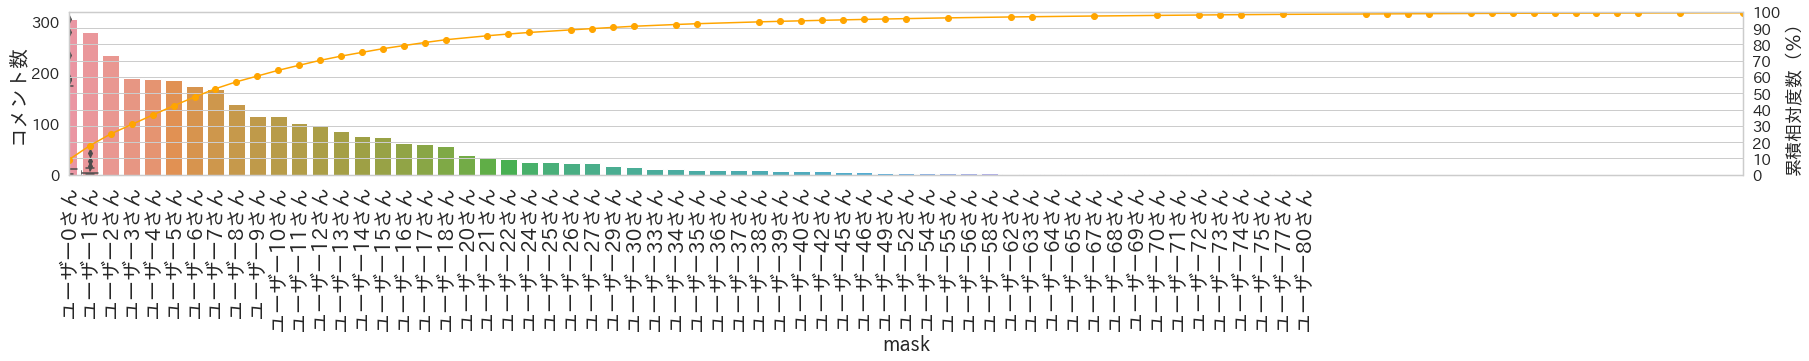

In [3]:
# -*- coding: utf-8 -*-
"""talk.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1z5xb3Ad5sW-KY4jg2xqsZc-J57yFhnWl
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from matplotlib import rcParams
sns.set(font="IPAexGothic", style="whitegrid")

import matplotlib as mpl
print(mpl.matplotlib_fname())

plt.plot([1, 2, 3, 4])
plt.xlabel('日本語フォントです。ABCWijG123')
plt.show()

#talks
talk_df = pd.read_csv("input/talks.csv",sep='\t')

#channels
channel_df = pd.read_csv("input/channels.csv",sep='\t')

#users
user_df = pd.read_csv("input/users.csv",sep='\t')

talk_df[talk_df["channel_id"]=="CNX7CKQJ1"]

#talk.csvのchannel数を調べる　→　channels.csvに対して１つ足りない
len(set(talk_df["channel_id"]))

set(talk_df["channel_id"])

channel_df["id"]

# Commented out IPython magic to ensure Python compatibility.
# %clear shadow_compress

talk_df.tail()

#まず'<@.........>さんがチャンネルに参加しました'を空白文字にする
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace('<@.{9}>さんがチャンネルに参加しました',"", regex=True)

#文中からリンクと<https:.........>、メンション<@.........>を排除
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace('<.*>',"", regex=True)

talk_df.tail()

talk_df.tail(10)

#```.....```で囲まれた箇所（コード）を空白にする
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace("```(.|\s)*```","", regex=True)

#:...: で絵文字を削除
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace(":.*:","", regex=True)

#&gt;（< >HTMLタグ）を削除
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace("\s&gt;","",regex=True)
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace("^&gt;","",regex=True)
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace(".&gt;","",regex=True)
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace(".&lt;","",regex=True)

talk_df.tail(10)

#文中の@を削除
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace("(.|\s)@(.|\s)","",regex=True)

#記号"■","●","#","【","】"を削除
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace(["\s■","\s●","\s#","\s・","\s【","】\s"],"",regex=True)

#記号"■","●","#","【","】"を削除
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace(["^■","^●","^#","^・","^【","】","^↑"],"",regex=True)

#"New"だけ以外の行を取り出す
talk_df = talk_df[~talk_df['text'].str.match("New lines on ",na=False)]

#空白以外の行を取り出す
talk_df = talk_df.loc[(talk_df['text']!="") & (talk_df['text']!=" ") & (talk_df['text']!="　")]

talk_df.tail()

talk_df.iloc[3141,:]["text"]

#チャンネル数を調べる
len(set(talk_df["channel_id"]))

set(talk_df["channel_id"])

talk_df[talk_df["channel_id"]=="CJRAUJTFY"]

user_df.head()

#登録者数を調べる
len(user_df["user_id"])

#登録者数一覧の辞書を作る

user_dict = user_df.set_index('user_id')['real_name_normalized']
user_dict = user_dict.to_dict()
user_dict

#channel一覧の辞書を作る
channel_dict = channel_df.set_index('id')['name']
channel_dict = channel_dict.to_dict()
channel_dict

#talk_dfの "talk_user" を　"real_name_normalized" に置き換える
talk_df["talk_user"] = talk_df["talk_user"].map(user_dict)

#talk_dfの "channel_id" を　"name" に置き換える
talk_df["channel_id"] = talk_df["channel_id"].map(channel_dict)

talk_df.head()

#indexを振り直す
talk_df = talk_df.reset_index(drop=True)

talk_df_only_intro=talk_df[talk_df["channel_id"]=="01-1-自己紹介"]

#自己紹介だけを取り出して保存する
talk_df_only_intro.to_csv("talksから自己紹介だけ取り出した.csv")

#投稿時間（ts）を時刻に変換（日本時間）
talk_df["ts"] = pd.to_datetime(talk_df["ts"],utc=True,unit="s")
talk_df['timestamp'] = pd.to_datetime(talk_df['ts'])
talk_df['date'] = talk_df['timestamp'].dt.date
talk_df['date'] = pd.to_datetime(talk_df['date'])

talk_df.head()

#talk_dfを日時ごとにソート
talk_df=talk_df.sort_values(by="timestamp")

#indexを振り直す
talk_df = talk_df.reset_index()

#自己紹介だけ取り出す
talk_df_only_introduce=talk_df[talk_df["channel_id"]=="01-1-自己紹介"]

#自己紹介している人を自己紹介時間でグループ化
talk_df_only_introduce_grouped = talk_df_only_introduce["timestamp"].groupby(talk_df_only_introduce["talk_user"])

#自己紹介した日時を算出
introduce_time=pd.DataFrame(talk_df_only_introduce_grouped.min())

#indexをリセットする
introduce_time=introduce_time.reset_index()

#列名を変える
introduce_time=introduce_time.rename(columns={'timestamp': '自己紹介日時'})

#introduce_timeを日時ごとにソート
introduce_time=introduce_time.sort_values(by="自己紹介日時")

#indexを振り直す
introduce_time=introduce_time.reset_index()

introduce_time.iloc[26]

#自己紹介の初めの日時と最終コメント日時の差分
(talk_df.iloc[-1,:]["timestamp"]- introduce_time["自己紹介日時"][0]).days

len(set(introduce_time["talk_user"]))

#保存する
talk_df.to_csv("talk_df.csv")

#日毎の投稿数
talk_df["date"].value_counts()

date_comment = pd.DataFrame(talk_df["date"].value_counts())
date_comment = date_comment.rename(columns={"date": "comments"})

date_comment["date"] = date_comment.index

date_comment = date_comment.sort_values(by="date")

date_comment.head()

date_comment.to_csv("日ごとのコメント数.csv")

#1日の平均コメント投稿数
date_comment["comments"].mean()

#7日ごとの移動平均線を追加
date_comment["sma_7days"] = date_comment['comments'].rolling(7).mean()

date_comment["month"]=date_comment.index.month

date_comment

plt.figure(figsize=(20, 10))
ax1 = sns.boxplot(x = "month" ,y = "comments",data = date_comment)
ax1.set_ylabel("コメント数" , fontsize=20)
ax1.set_xlabel("月" , fontsize=20)
ax1.tick_params(axis="y",labelsize=20)
ax1.tick_params(axis="x",labelsize=20)

plt.figure(figsize=(20, 10))
ax1 = sns.lineplot(x = "date" ,y = "comments",data = date_comment , label="row")
ax2 = sns.lineplot(x = "date" ,y = "sma_7days",data = date_comment , label="7日間移動平均")


ax1.set_ylabel("コメント数" , fontsize=20)
ax1.set_xlabel("日付" , fontsize=20)
ax1.tick_params(axis="y",labelsize=20)
ax1.tick_params(axis="x",labelsize=20)
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)

#一度csvにしてみる
talk_df.to_csv("talk_df_20191011.csv")

#コメント総数
len(talk_df)

#村上さん以外の発言数
len(talk_df[talk_df["talk_user"]!="村上 智之"])

#チャンネルごとにコメント数を算出する
channel_count = talk_df["channel_id"].value_counts()
channel_count

#ユーザーごとにコメント数を算出する
comment_count = talk_df["talk_user"].value_counts()
comment_count

comment_df = pd.DataFrame(comment_count)

#indexを振り直す
comment_df=comment_df.reset_index()

#名前を付け直す
comment_df.rename(columns={"index":"talk_user","talk_user":"comments"},inplace=True)

comment_df

#村上さんを除いたcomment_df
comment_df_lessMura=comment_df[1:]

#indexを振り直す
comment_df_lessMura=comment_df_lessMura.reset_index()

comment_df_lessMura

comment_df["Percentage[%]"] = (comment_df["comments"]/len(talk_df))*100
comment_df["Cumulative sum[%]"] = comment_df["Percentage[%]"].cumsum()

comment_df_lessMura["Percentage[%]"] = (comment_df_lessMura["comments"]/len(talk_df[talk_df["talk_user"]!="村上 智之"]))*100
comment_df_lessMura["Cumulative sum[%]"] = comment_df_lessMura["Percentage[%]"].cumsum()

comment_df_lessMura

ax1 = sns.barplot(x=comment_df["talk_user"][:20] ,y = "comments",data = comment_df[:20])
ax2 = ax1.twinx()

comment_df["Cumulative sum[%]"][:20].plot(figsize=(15, 3), color='orange', ax=ax2, marker='o')
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation='vertical' , fontsize=20)
ax1.set_ylabel("コメント数" , fontsize=20)
ax2.set_ylabel("累積相対度数（％）" , fontsize=18)
ax2.set_ylim([0,100])
ax1.tick_params(axis="y",labelsize=15,color="white")
ax2.tick_params(axis="y",labelsize=15,color="white")

#ax1の目盛り線を消した
ax1.grid(which = "major", axis = "y", color = "blue", alpha = 0.8,
        linestyle = "", linewidth = 1)

ax2.set_yticks(list(range(0,110,10)))

ax1 = sns.barplot(x=comment_df_lessMura["talk_user"] ,y = "comments",data = comment_df_lessMura)
ax2 = ax1.twinx()

comment_df_lessMura["Cumulative sum[%]"].plot(figsize=(30, 3), color='orange', ax=ax2, marker='o')
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation='vertical' , fontsize=20)
ax1.set_ylabel("コメント数" , fontsize=20)
ax2.set_ylabel("累積相対度数（％）" , fontsize=18)
ax2.set_ylim([0,100])
ax1.tick_params(axis="y",labelsize=15,color="white")
ax2.tick_params(axis="y",labelsize=15,color="white")

#ax1の目盛り線を消した
ax1.grid(which = "major", axis = "y", color = "blue", alpha = 0.8,
        linestyle = "", linewidth = 1)

ax2.set_yticks(list(range(0,110,10)))

channel_df = pd.DataFrame(channel_count)

channel_df

channel_df["Percentage[%]"] = (channel_df["channel_id"]/channel_df["channel_id"].sum())*100
channel_df["Cumulative sum[%]"] = channel_df["Percentage[%]"].cumsum()
channel_df = channel_df.rename(columns={"index": "channel","channel_id":"comments"})

channel_df

ax1 = sns.barplot(x=channel_df.index[:26] ,y = "comments",data = channel_df[:26])
ax2 = ax1.twinx()

channel_df["Cumulative sum[%]"][:26].plot(figsize=(15, 3), color='orange', ax=ax2, marker='o')
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation='vertical' , fontsize=20)
ax1.set_ylabel("コメント数" , fontsize=20)
ax2.set_ylabel("累積相対度数（％）" , fontsize=18)
ax2.set_ylim([0,100])
ax1.tick_params(axis="y",labelsize=15,color="white")
ax2.tick_params(axis="y",labelsize=15,color="white")

#ax1の目盛り線を消した
ax1.grid(which = "major", axis = "y", color = "blue", alpha = 0.8,
        linestyle = "", linewidth = 1)

ax2.set_yticks(list(range(0,110,10)))

#自己紹介だけを抜き出す
only_self_introduction = talk_df[talk_df["channel_id"] == "01-1-自己紹介"]

#自己紹介しているであろうユーザーを抜き出す
user_self_introduction = set(only_self_introduction["talk_user"])
len(user_self_introduction)

#自己紹介している人＝１、していない人＝０
comment_df["自己紹介"]="無"
comment_df["自己紹介してからの日数"]=1

for i in range(len(comment_df)):
    if comment_df["talk_user"][i] in user_self_introduction:
        comment_df["自己紹介"][i]="あり"
        comment_df["自己紹介してからの日数"][i]=(talk_df.iloc[-1,:]["timestamp"]-introduce_time[introduce_time["talk_user"]==comment_df["talk_user"][i]]["自己紹介日時"]).astype('timedelta64[D]').astype(int)
    else:
        comment_df["自己紹介"][i]="なし"
        comment_df["自己紹介してからの日数"][i]=""

#自己紹介している人＝１、していない人＝０
comment_df_lessMura["自己紹介"]="無"
comment_df_lessMura["自己紹介してからの日数"]=1

for i in range(len(comment_df_lessMura)):
    if comment_df_lessMura["talk_user"][i] in user_self_introduction:
        comment_df_lessMura["自己紹介"][i]="あり"
        comment_df_lessMura["自己紹介してからの日数"][i]=(talk_df.iloc[-1,:]["timestamp"]-introduce_time[introduce_time["talk_user"]==comment_df_lessMura["talk_user"][i]]["自己紹介日時"]).astype('timedelta64[D]').astype(int)
    else:
        comment_df_lessMura["自己紹介"][i]="なし"
        comment_df_lessMura["自己紹介してからの日数"][i]=""

(talk_df.iloc[-1,:]["timestamp"]-introduce_time[introduce_time["talk_user"]==comment_df["talk_user"][0]]["自己紹介日時"]).astype('timedelta64[D]').astype(int)

comment_df["自己紹介してからの日数"][1]

(talk_df.iloc[-1,:]["timestamp"]-introduce_time[introduce_time["talk_user"]==comment_df.index[1]]["自己紹介日時"])

for i in range(len(comment_df)):
    print(list((talk_df.iloc[-1,:]["timestamp"]-introduce_time[introduce_time["talk_user"]==comment_df["talk_user"][i]]["自己紹介日時"]).astype('timedelta64[D]').astype(int)))

comment_df

comment_df.to_csv('comment_df.csv')

comment_df_lessMura.to_csv('comment_df_lessMura.csv')

#コメントしているけど自己紹介していない人 21人
comment_df[comment_df["自己紹介"]=="なし"]

#コメントも自己紹介もしてる人 61人
comment_df[comment_df["自己紹介"]=="あり"]

#自己紹介した人としていない人の比較,村上さん除く
plt.figure(figsize=(20, 10))
ax1 = sns.boxplot(x = "自己紹介" ,y = "comments",data = comment_df[1:])
ax1.set_ylabel("コメント数" , fontsize=20)
ax1.set_xlabel("自己紹介の有無" , fontsize=20)
ax1.tick_params(axis="y",labelsize=20)
ax1.tick_params(axis="x",labelsize=20)

#自己紹介している人としていない人のコメント数を比べる（村上さん除く）
user_self_introduction_grouped = comment_df["comments"][1:].groupby(comment_df["自己紹介"][1:])

#自己紹介有無でのコメント平均値
user_self_introduction_grouped.mean()

comment_df_lessMura_only_intro=comment_df_lessMura[comment_df_lessMura["自己紹介"]=="あり"]

comment_df_lessMura['mask'] = [f'ユーザー{i}さん' for i in range(len(comment_df_lessMura['talk_user']))]
#村上さん除いたパレート図（自己紹介ありのみ）
ax1 = sns.barplot(x=comment_df_lessMura[comment_df_lessMura["自己紹介"]=="あり"]["mask"],y = "comments",data = comment_df_lessMura[comment_df_lessMura["自己紹介"]=="あり"])
ax2 = ax1.twinx()

comment_df_lessMura[comment_df_lessMura["自己紹介"]=="あり"]["Cumulative sum[%]"].plot(figsize=(30, 3), color='orange', ax=ax2, marker='o')
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation='vertical' , fontsize=20)
ax1.set_ylabel("コメント数" , fontsize=20)
ax2.set_ylabel("累積相対度数（％）" , fontsize=18)
ax2.set_ylim([0,100])
ax1.tick_params(axis="y",labelsize=15,color="white")
ax2.tick_params(axis="y",labelsize=15,color="white")

#ax1の目盛り線を消した
ax1.grid(which = "major", axis = "y", color = "blue", alpha = 0.8,
        linestyle = "", linewidth = 1)

ax2.set_yticks(list(range(0,110,10)))

plot.show()


In [ ]:
# -*- coding: utf-8 -*-
"""talk.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1z5xb3Ad5sW-KY4jg2xqsZc-J57yFhnWl
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from matplotlib import rcParams
sns.set(font="IPAexGothic", style="whitegrid")

import matplotlib as mpl
print(mpl.matplotlib_fname())

plt.plot([1, 2, 3, 4])
plt.xlabel('日本語フォントです。ABCWijG123')
plt.show()

#talks
talk_df = pd.read_csv("input/talks.csv",sep='\t')

#channels
channel_df = pd.read_csv("input/channels.csv",sep='\t')

#users
user_df = pd.read_csv("input/users.csv",sep='\t')

talk_df[talk_df["channel_id"]=="CNX7CKQJ1"]

#talk.csvのchannel数を調べる　→　channels.csvに対して１つ足りない
len(set(talk_df["channel_id"]))

set(talk_df["channel_id"])

channel_df["id"]

# Commented out IPython magic to ensure Python compatibility.
# %clear shadow_compress

talk_df.tail()

#まず'<@.........>さんがチャンネルに参加しました'を空白文字にする
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace('<@.{9}>さんがチャンネルに参加しました',"", regex=True)

#文中からリンクと<https:.........>、メンション<@.........>を排除
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace('<.*>',"", regex=True)

talk_df.tail()

talk_df.tail(10)

#```.....```で囲まれた箇所（コード）を空白にする
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace("```(.|\s)*```","", regex=True)

#:...: で絵文字を削除
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace(":.*:","", regex=True)

#&gt;（< >HTMLタグ）を削除
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace("\s&gt;","",regex=True)
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace("^&gt;","",regex=True)
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace(".&gt;","",regex=True)
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace(".&lt;","",regex=True)

talk_df.tail(10)

#文中の@を削除
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace("(.|\s)@(.|\s)","",regex=True)

#記号"■","●","#","【","】"を削除
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace(["\s■","\s●","\s#","\s・","\s【","】\s"],"",regex=True)

#記号"■","●","#","【","】"を削除
talk_df.loc[:,'text'] = talk_df.loc[:,'text'].replace(["^■","^●","^#","^・","^【","】","^↑"],"",regex=True)

#"New"だけ以外の行を取り出す
talk_df = talk_df[~talk_df['text'].str.match("New lines on ",na=False)]

#空白以外の行を取り出す
talk_df = talk_df.loc[(talk_df['text']!="") & (talk_df['text']!=" ") & (talk_df['text']!="　")]

talk_df.tail()

talk_df.iloc[3141,:]["text"]

#チャンネル数を調べる
len(set(talk_df["channel_id"]))

set(talk_df["channel_id"])

talk_df[talk_df["channel_id"]=="CJRAUJTFY"]

user_df.head()

#登録者数を調べる
len(user_df["user_id"])

#登録者数一覧の辞書を作る

user_dict = user_df.set_index('user_id')['real_name_normalized']
user_dict = user_dict.to_dict()
user_dict

#channel一覧の辞書を作る
channel_dict = channel_df.set_index('id')['name']
channel_dict = channel_dict.to_dict()
channel_dict

#talk_dfの "talk_user" を　"real_name_normalized" に置き換える
talk_df["talk_user"] = talk_df["talk_user"].map(user_dict)

#talk_dfの "channel_id" を　"name" に置き換える
talk_df["channel_id"] = talk_df["channel_id"].map(channel_dict)

talk_df.head()

#indexを振り直す
talk_df = talk_df.reset_index(drop=True)

talk_df_only_intro=talk_df[talk_df["channel_id"]=="01-1-自己紹介"]

#自己紹介だけを取り出して保存する
talk_df_only_intro.to_csv("talksから自己紹介だけ取り出した.csv")

#投稿時間（ts）を時刻に変換（日本時間）
talk_df["ts"] = pd.to_datetime(talk_df["ts"],utc=True,unit="s")
talk_df['timestamp'] = pd.to_datetime(talk_df['ts'])
talk_df['date'] = talk_df['timestamp'].dt.date
talk_df['date'] = pd.to_datetime(talk_df['date'])

talk_df.head()

#talk_dfを日時ごとにソート
talk_df=talk_df.sort_values(by="timestamp")

#indexを振り直す
talk_df = talk_df.reset_index()

#自己紹介だけ取り出す
talk_df_only_introduce=talk_df[talk_df["channel_id"]=="01-1-自己紹介"]

#自己紹介している人を自己紹介時間でグループ化
talk_df_only_introduce_grouped = talk_df_only_introduce["timestamp"].groupby(talk_df_only_introduce["talk_user"])

#自己紹介した日時を算出
introduce_time=pd.DataFrame(talk_df_only_introduce_grouped.min())

#indexをリセットする
introduce_time=introduce_time.reset_index()

#列名を変える
introduce_time=introduce_time.rename(columns={'timestamp': '自己紹介日時'})

#introduce_timeを日時ごとにソート
introduce_time=introduce_time.sort_values(by="自己紹介日時")

#indexを振り直す
introduce_time=introduce_time.reset_index()

introduce_time.iloc[26]

#自己紹介の初めの日時と最終コメント日時の差分
(talk_df.iloc[-1,:]["timestamp"]- introduce_time["自己紹介日時"][0]).days

len(set(introduce_time["talk_user"]))

#保存する
talk_df.to_csv("talk_df.csv")

#日毎の投稿数
talk_df["date"].value_counts()

date_comment = pd.DataFrame(talk_df["date"].value_counts())
date_comment = date_comment.rename(columns={"date": "comments"})

date_comment["date"] = date_comment.index

date_comment = date_comment.sort_values(by="date")

date_comment.head()

date_comment.to_csv("日ごとのコメント数.csv")

#1日の平均コメント投稿数
date_comment["comments"].mean()

#7日ごとの移動平均線を追加
date_comment["sma_7days"] = date_comment['comments'].rolling(7).mean()

date_comment["month"]=date_comment.index.month

date_comment

plt.figure(figsize=(20, 10))
ax1 = sns.boxplot(x = "month" ,y = "comments",data = date_comment)
ax1.set_ylabel("コメント数" , fontsize=20)
ax1.set_xlabel("月" , fontsize=20)
ax1.tick_params(axis="y",labelsize=20)
ax1.tick_params(axis="x",labelsize=20)

plt.figure(figsize=(20, 10))
ax1 = sns.lineplot(x = "date" ,y = "comments",data = date_comment , label="row")
ax2 = sns.lineplot(x = "date" ,y = "sma_7days",data = date_comment , label="7日間移動平均")


ax1.set_ylabel("コメント数" , fontsize=20)
ax1.set_xlabel("日付" , fontsize=20)
ax1.tick_params(axis="y",labelsize=20)
ax1.tick_params(axis="x",labelsize=20)
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)

#一度csvにしてみる
talk_df.to_csv("talk_df_20191011.csv")

#コメント総数
len(talk_df)

#村上さん以外の発言数
len(talk_df[talk_df["talk_user"]!="村上 智之"])

#チャンネルごとにコメント数を算出する
channel_count = talk_df["channel_id"].value_counts()
channel_count

#ユーザーごとにコメント数を算出する
comment_count = talk_df["talk_user"].value_counts()
comment_count

comment_df = pd.DataFrame(comment_count)

#indexを振り直す
comment_df=comment_df.reset_index()

#名前を付け直す
comment_df.rename(columns={"index":"talk_user","talk_user":"comments"},inplace=True)

comment_df

#村上さんを除いたcomment_df
comment_df_lessMura=comment_df[1:]

#indexを振り直す
comment_df_lessMura=comment_df_lessMura.reset_index()

comment_df_lessMura

comment_df["Percentage[%]"] = (comment_df["comments"]/len(talk_df))*100
comment_df["Cumulative sum[%]"] = comment_df["Percentage[%]"].cumsum()

comment_df_lessMura["Percentage[%]"] = (comment_df_lessMura["comments"]/len(talk_df[talk_df["talk_user"]!="村上 智之"]))*100
comment_df_lessMura["Cumulative sum[%]"] = comment_df_lessMura["Percentage[%]"].cumsum()

comment_df_lessMura

ax1 = sns.barplot(x=comment_df["talk_user"][:20] ,y = "comments",data = comment_df[:20])
ax2 = ax1.twinx()

comment_df["Cumulative sum[%]"][:20].plot(figsize=(15, 3), color='orange', ax=ax2, marker='o')
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation='vertical' , fontsize=20)
ax1.set_ylabel("コメント数" , fontsize=20)
ax2.set_ylabel("累積相対度数（％）" , fontsize=18)
ax2.set_ylim([0,100])
ax1.tick_params(axis="y",labelsize=15,color="white")
ax2.tick_params(axis="y",labelsize=15,color="white")

#ax1の目盛り線を消した
ax1.grid(which = "major", axis = "y", color = "blue", alpha = 0.8,
        linestyle = "", linewidth = 1)

ax2.set_yticks(list(range(0,110,10)))

ax1 = sns.barplot(x=comment_df_lessMura["talk_user"] ,y = "comments",data = comment_df_lessMura)
ax2 = ax1.twinx()

comment_df_lessMura["Cumulative sum[%]"].plot(figsize=(30, 3), color='orange', ax=ax2, marker='o')
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation='vertical' , fontsize=20)
ax1.set_ylabel("コメント数" , fontsize=20)
ax2.set_ylabel("累積相対度数（％）" , fontsize=18)
ax2.set_ylim([0,100])
ax1.tick_params(axis="y",labelsize=15,color="white")
ax2.tick_params(axis="y",labelsize=15,color="white")

#ax1の目盛り線を消した
ax1.grid(which = "major", axis = "y", color = "blue", alpha = 0.8,
        linestyle = "", linewidth = 1)

ax2.set_yticks(list(range(0,110,10)))

channel_df = pd.DataFrame(channel_count)

channel_df

channel_df["Percentage[%]"] = (channel_df["channel_id"]/channel_df["channel_id"].sum())*100
channel_df["Cumulative sum[%]"] = channel_df["Percentage[%]"].cumsum()
channel_df = channel_df.rename(columns={"index": "channel","channel_id":"comments"})

channel_df

ax1 = sns.barplot(x=channel_df.index[:26] ,y = "comments",data = channel_df[:26])
ax2 = ax1.twinx()

channel_df["Cumulative sum[%]"][:26].plot(figsize=(15, 3), color='orange', ax=ax2, marker='o')
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation='vertical' , fontsize=20)
ax1.set_ylabel("コメント数" , fontsize=20)
ax2.set_ylabel("累積相対度数（％）" , fontsize=18)
ax2.set_ylim([0,100])
ax1.tick_params(axis="y",labelsize=15,color="white")
ax2.tick_params(axis="y",labelsize=15,color="white")

#ax1の目盛り線を消した
ax1.grid(which = "major", axis = "y", color = "blue", alpha = 0.8,
        linestyle = "", linewidth = 1)

ax2.set_yticks(list(range(0,110,10)))

#自己紹介だけを抜き出す
only_self_introduction = talk_df[talk_df["channel_id"] == "01-1-自己紹介"]

#自己紹介しているであろうユーザーを抜き出す
user_self_introduction = set(only_self_introduction["talk_user"])
len(user_self_introduction)

#自己紹介している人＝１、していない人＝０
comment_df["自己紹介"]="無"
comment_df["自己紹介してからの日数"]=1

for i in range(len(comment_df)):
    if comment_df["talk_user"][i] in user_self_introduction:
        comment_df["自己紹介"][i]="あり"
        comment_df["自己紹介してからの日数"][i]=(talk_df.iloc[-1,:]["timestamp"]-introduce_time[introduce_time["talk_user"]==comment_df["talk_user"][i]]["自己紹介日時"]).astype('timedelta64[D]').astype(int)
    else:
        comment_df["自己紹介"][i]="なし"
        comment_df["自己紹介してからの日数"][i]=""

#自己紹介している人＝１、していない人＝０
comment_df_lessMura["自己紹介"]="無"
comment_df_lessMura["自己紹介してからの日数"]=1

for i in range(len(comment_df_lessMura)):
    if comment_df_lessMura["talk_user"][i] in user_self_introduction:
        comment_df_lessMura["自己紹介"][i]="あり"
        comment_df_lessMura["自己紹介してからの日数"][i]=(talk_df.iloc[-1,:]["timestamp"]-introduce_time[introduce_time["talk_user"]==comment_df_lessMura["talk_user"][i]]["自己紹介日時"]).astype('timedelta64[D]').astype(int)
    else:
        comment_df_lessMura["自己紹介"][i]="なし"
        comment_df_lessMura["自己紹介してからの日数"][i]=""

(talk_df.iloc[-1,:]["timestamp"]-introduce_time[introduce_time["talk_user"]==comment_df["talk_user"][0]]["自己紹介日時"]).astype('timedelta64[D]').astype(int)

comment_df["自己紹介してからの日数"][1]

(talk_df.iloc[-1,:]["timestamp"]-introduce_time[introduce_time["talk_user"]==comment_df.index[1]]["自己紹介日時"])

for i in range(len(comment_df)):
    print(list((talk_df.iloc[-1,:]["timestamp"]-introduce_time[introduce_time["talk_user"]==comment_df["talk_user"][i]]["自己紹介日時"]).astype('timedelta64[D]').astype(int)))

comment_df

comment_df.to_csv('comment_df.csv')

comment_df_lessMura.to_csv('comment_df_lessMura.csv')

#コメントしているけど自己紹介していない人 21人
comment_df[comment_df["自己紹介"]=="なし"]

#コメントも自己紹介もしてる人 61人
comment_df[comment_df["自己紹介"]=="あり"]

#自己紹介した人としていない人の比較,村上さん除く
plt.figure(figsize=(20, 10))
ax1 = sns.boxplot(x = "自己紹介" ,y = "comments",data = comment_df[1:])
ax1.set_ylabel("コメント数" , fontsize=20)
ax1.set_xlabel("自己紹介の有無" , fontsize=20)
ax1.tick_params(axis="y",labelsize=20)
ax1.tick_params(axis="x",labelsize=20)

#自己紹介している人としていない人のコメント数を比べる（村上さん除く）
user_self_introduction_grouped = comment_df["comments"][1:].groupby(comment_df["自己紹介"][1:])

#自己紹介有無でのコメント平均値
user_self_introduction_grouped.mean()

comment_df_lessMura_only_intro=comment_df_lessMura[comment_df_lessMura["自己紹介"]=="あり"]

comment_df_lessMura['mask'] = [f'ユーザー{i}さん' for i in range(len(comment_df_lessMura['talk_user']))]
#村上さん除いたパレート図（自己紹介ありのみ）
ax1 = sns.barplot(x=comment_df_lessMura[comment_df_lessMura["自己紹介"]=="あり"]["mask"],y = "comments",data = comment_df_lessMura[comment_df_lessMura["自己紹介"]=="あり"])
ax2 = ax1.twinx()

comment_df_lessMura[comment_df_lessMura["自己紹介"]=="あり"]["Cumulative sum[%]"].plot(figsize=(30, 3), color='orange', ax=ax2, marker='o')
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation='vertical' , fontsize=20)
ax1.set_ylabel("コメント数" , fontsize=20)
ax2.set_ylabel("累積相対度数（％）" , fontsize=18)
ax2.set_ylim([0,100])
ax1.tick_params(axis="y",labelsize=15,color="white")
ax2.tick_params(axis="y",labelsize=15,color="white")

#ax1の目盛り線を消した
ax1.grid(which = "major", axis = "y", color = "blue", alpha = 0.8,
        linestyle = "", linewidth = 1)

ax2.set_yticks(list(range(0,110,10)))

